Serie temporal sistema lagunar peine

ingreso de series temporales de pozos de monitoreo de nivel en peine, mediciones por SQM 

In [4]:

import os
import pandas as pd
import pastas as ps
import matplotlib.pyplot as plt

ps.set_log_level("ERROR")
ps.show_versions()

Pastas version: 1.8.1
Python version: 3.11.8
NumPy version: 2.1.3
Pandas version: 2.2.3
SciPy version: 1.15.2
Matplotlib version: 3.10.0
Numba version: 0.61.0


aca se configura la ruta a la base de datos , para los niveles, la precipitacion y la evaporacion.

In [5]:
# --- Paso 1: Configuración inicial ---
# Ruta de la carpeta con los datos de nivel de pozos
# carpeta_pozos = os.path.r'C:\\Users\\alvar\\Desktop\\Programacion (machine learning, data science)\\modelo pastas peine\\datos\\pozos nivel peine'

# # Rutas de los archivos de estrés (precipitación y evaporación)
# archivos_precipitacion = [r'C:\\Users\\alvar\\Desktop\\Programacion (machine learning, data science)\\modelo pastas peine\\datos\\resultados_meteo\\precip\\Prec_CHAXA.csv', 
#                           r'C:\\Users\\alvar\\Desktop\\Programacion (machine learning, data science)\\modelo pastas peine\\datos\\resultados_meteo\\precip\\Prec_LZA9-1 (Interna).csv', 
#                           r'C:\\Users\\alvar\\Desktop\\Programacion (machine learning, data science)\\modelo pastas peine\\datos\\resultados_meteo\\precip\\Prec_LZA10-1.csv']
# archivos_evaporacion = [r'C:\\Users\\alvar\\Desktop\\Programacion (machine learning, data science)\\modelo pastas peine\\datos\\resultados_meteo\\evap\\Evap_CHAXA.csv', 
#                         r'C:\\Users\\alvar\\Desktop\\Programacion (machine learning, data science)\\modelo pastas peine\\datos\\resultados_meteo\\evap\\Evap_LZA9-1 (Interna).csv']


carpeta_pozos = os.path.join('datos', 'pozos nivel peine')

# Rutas de los archivos de estrés (precipitación y evaporación)
archivos_precipitacion = [os.path.join('datos', 'resultados_meteo', 'precip', 'Prec_CHAXA.csv'), 
                          os.path.join('datos', 'resultados_meteo', 'precip', 'Prec_LZA9-1 (Interna).csv'), 
                          os.path.join('datos', 'resultados_meteo', 'precip', 'Prec_LZA10-1.csv')]
archivos_evaporacion = [os.path.join('datos', 'resultados_meteo', 'evap', 'Evap_CHAXA.csv'), 
                        os.path.join('datos', 'resultados_meteo', 'evap', 'Evap_LZA9-1 (Interna).csv')]

In [6]:
reference_levels = pd.Series({
    "1024": 2300.950,
    "1028": 2301.448,
    "2037": 2301.929,
    "2018": 2301.762,
    "GD-03": 2301.051,
    "GD-04": 2300.880,
    "L10-1": 2305.996,
    "L10-2": 2301.602,
    "L10-3": 2301.877,
    "L10-4": 2301.882,
    "L10-5": 2301.747,
    "L10-6": 2301.760,
    "L10-7": 2301.976,
    "L10-8": 2301.993,
    "L10-9": 2302.035,
    "L10-10": 2302.046,
    "L10-11": 2301.782,
    "L10-12": 2301.832,
    "L10-13": 2301.961,
    "L10-14": 2302.007,
    "L10-15": 2301.859,
    "L10-16": 2301.935,
    "L10-17": 2301.901,
    "REGLILLA INTERNA CONAF": 2301.456,
    "REGLILLA SALADA CONAF": 2301.963,
    "REGLILLA SALADITA CONAF": 2301.762
})

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a fo

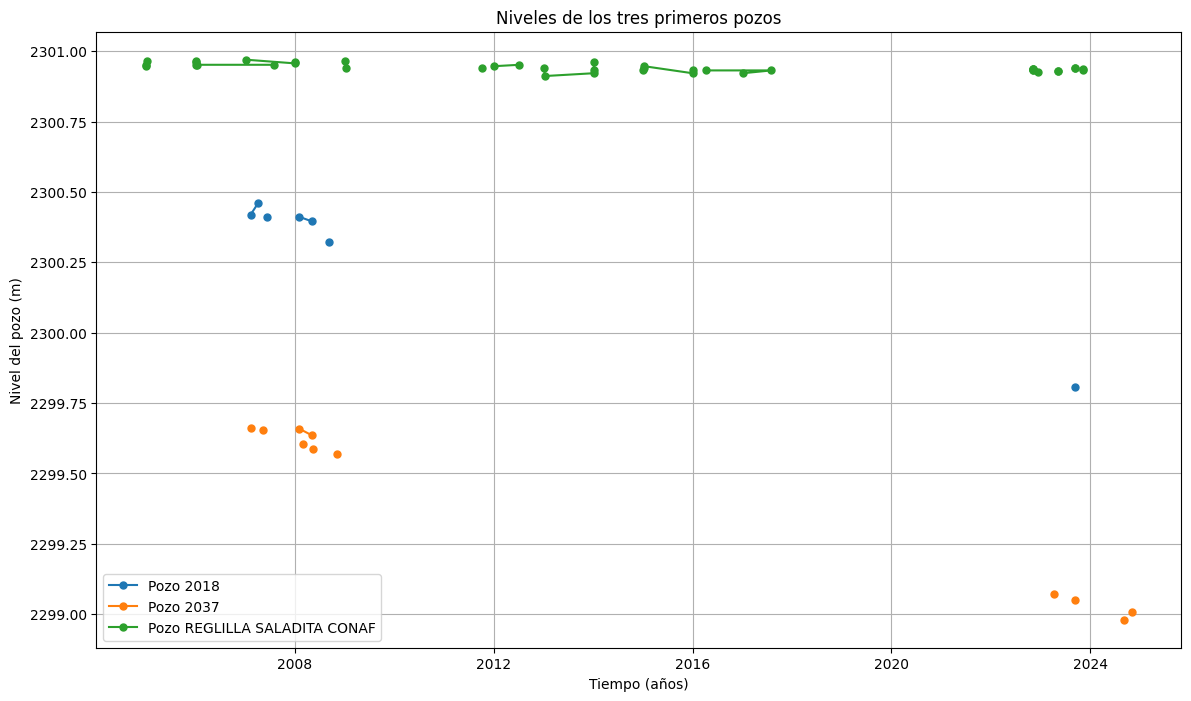

**********
Fecha
1999-08-01    0.0
1999-08-02    0.0
1999-08-03    0.0
1999-08-04    0.0
1999-08-05    0.0
             ... 
2024-12-27    0.0
2024-12-28    0.0
2024-12-29    0.0
2024-12-30    0.0
2024-12-31    0.0
Freq: D, Name: Precipitación, Length: 9285, dtype: float64


In [ ]:

# Leer los datos de nivel de los pozos
datos_pozos = {}

for archivo in os.listdir(carpeta_pozos):
    if archivo.endswith(".csv"):
        nombre_pozo = archivo.split(".")[0]
        ruta_archivo = os.path.join(carpeta_pozos, archivo)
        
        # Leer el archivo CSV y convertirlo en una Series
        datos = pd.read_csv(ruta_archivo, index_col=0, parse_dates=True)
        datos.index = pd.to_datetime(datos.index, errors='coerce')  # Asegurarse de que el índice sea de tipo datetime
        datos_series = datos.squeeze("columns")  # Convertir DataFrame a Series
        datos_series = reference_levels[nombre_pozo[5:]] - datos_series # Heads
        # datos_series = datos_series - 2300 # Heads above 2300 msnm
        datos_pozos[nombre_pozo] = datos_series 

# Verificar que los datos de los pozos se han leído y convertido correctamente
# for pozo, datos in datos_pozos.items():
    # print(f"\nDatos del pozo {pozo}:")
    # print(datos.head())
    # print(datos.info())
#graficar los datos de los pozos
# Graficar los datos de los tres primeros pozos
plt.figure(figsize=(14, 8))

for i, (pozo, datos) in enumerate(datos_pozos.items()):
    if i < 3:
        plt.plot(datos.index, datos.values, label=pozo, marker='o', linestyle='-', markersize=5)

plt.xlabel('Tiempo (años)')
plt.ylabel('Nivel del pozo (m)')
plt.title('Niveles de los tres primeros pozos')
plt.legend()
plt.grid(True)
plt.show()

pp =pd.read_csv(os.path.join('datos', 'resultados_meteo', 'precip', 'Prec_CHAXA.csv'), index_col=0, parse_dates=True)#, format='%d/%m/%Y')
pp.index = pd.to_datetime(pp.index, format='%d/%m/%Y')
pp = pp.squeeze("columns")
pp = pp.resample('D').sum()
# pp = pp.resample('M').sum()
print("**********")
print(pp)

# Graficar los datos de todos los pozos
fig, ax1 = plt.subplots(figsize=(14, 8))

for pozo, datos in datos_pozos.items():
    if pozo != "Pozo REGLILLA SALADITA CONAF" and pozo != "Pozo REGLILLA SALADA CONAF" and pozo != "Pozo REGLILLA INTERNA CONAF" and pozo != "Pozo L10-1" and pozo != "Pozo L10-11" and pozo != "Pozo 1028" and pozo != "Pozo 1024":
        ax1.plot(datos.index, datos.values, label=pozo, marker='o', linestyle='-', markersize=5)
        

ax2 = ax1.twinx()
ax2.invert_yaxis() 
ax2.bar(pp.index, pp.values, width=20, color='gray', alpha=0.6, label='Precipitación (mm)')
# ax2.set_yscale('log')
ax1.set_ylim(2298.6,2303)
ax2.set_ylim(60, 0)

ax1.set_xlabel('Tiempo (años)')
ax1.set_ylabel('Nivel del pozo (m)')
plt.title('Niveles de todos los pozos')
# plt.legend(loc='best')
plt.xlim('2002', '2028')
# plt.tight_layout()
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc="lower left")  # Leyenda combinada

# plt.grid(True)
plt.show()

fig, ax1 = plt.subplots(figsize=(14, 8))

for pozo, datos in datos_pozos.items():
    if pozo == "Pozo REGLILLA SALADITA CONAF" or pozo == "Pozo REGLILLA SALADA CONAF" or pozo == "Pozo REGLILLA INTERNA CONAF":
        datos.dropna(inplace=True)
        datos.sort_index(inplace=True)
        ax1.plot(datos.index, datos.values, label=pozo, marker='o', linestyle='-', markersize=5)
        

ax2 = ax1.twinx()
ax2.invert_yaxis() 
ax2.bar(pp.index, pp.values, width=20, color='gray', alpha=0.6, label='Precipitación (mm)')
# ax2.set_yscale('log')
# ax1.set_ylim(2298.6,2303)
ax2.set_ylim(60, 0)

ax1.set_xlabel('Tiempo (años)')
ax1.set_ylabel('Nivel del pozo (m)')
plt.title('Niveles de todos los pozos')
# plt.legend(loc='best')
# plt.xlim('2002', '2028')
# plt.tight_layout()
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc="lower left")  # Leyenda combinada

# plt.grid(True)
plt.show()

fig, ax1 = plt.subplots(figsize=(14, 8))

for pozo, datos in datos_pozos.items():
    if pozo == "Pozo L10-1" or pozo == "Pozo L10-11" or pozo == "Pozo 1028" and pozo == "Pozo 1024":
        ax1.plot(datos.index, datos.values, label=pozo, marker='o', linestyle='-', markersize=5)
        

ax2 = ax1.twinx()
ax2.invert_yaxis() 
ax2.bar(pp.index, pp.values, width=20, color='gray', alpha=0.6, label='Precipitación (mm)')
# ax2.set_yscale('log')
ax1.set_ylim(2298.6,2303)
ax2.set_ylim(60, 0)

ax1.set_xlabel('Tiempo (años)')
ax1.set_ylabel('Nivel del pozo (m)')
plt.title('Niveles de todos los pozos')
# plt.legend(loc='best')
plt.xlim('2002', '2028')
# plt.tight_layout()
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc="lower left")  # Leyenda combinada

# plt.grid(True)
plt.show()

In [3]:
# --- Paso 2: Leer datos de estrés ---
# Leer y concatenar datos de precipitación
precipitacion_list = [pd.read_csv(archivo, index_col=0, parse_dates=True).squeeze("columns") for archivo in archivos_precipitacion]
precipitacion = pd.concat(precipitacion_list).groupby(level=0).mean()

# Leer y concatenar datos de evaporación
evaporacion_list = [pd.read_csv(archivo, index_col=0, parse_dates=True).squeeze("columns") for archivo in archivos_evaporacion]
evaporacion = pd.concat(evaporacion_list).groupby(level=0).mean()

# Verificar que los datos se han leído correctamente
print("Datos de precipitación:")
print(precipitacion.head())
print("\nDatos de evaporación:")
print(evaporacion.head())


# Graficar los datos de estrés (precipitación y evaporación) por separado

# Graficar datos de precipitación
plt.figure(figsize=(14, 8))
plt.plot(precipitacion.index, precipitacion.values, label='Precipitación', color='blue', linestyle='-')
plt.xlabel('Tiempo (años)')
plt.ylabel('Precipitación (mm)')
plt.title('Datos de Precipitación')
plt.legend()
plt.grid(True)
plt.show()

# Graficar datos de evaporación
plt.figure(figsize=(14, 8))
plt.plot(evaporacion.index, evaporacion.values, label='Evaporación', color='red', linestyle='-')
plt.xlabel('Tiempo (años)')
plt.ylabel('Evaporación (mm)')
plt.title('Datos de Evaporación')
plt.legend()
plt.grid(True)
plt.show()

# Graficar todas las series de precipitación juntas
plt.figure(figsize=(14, 8))
for i, serie in enumerate(precipitacion_list):
    plt.plot(serie.index, serie.values, label=f'Precipitación {i+1}', linestyle='-')
plt.xlabel('Tiempo (años)')
plt.ylabel('Precipitación (mm)')
plt.title('Todas las series de Precipitación')
plt.legend()
plt.grid(True)
plt.show()

# Graficar todas las series de evaporación juntas
plt.figure(figsize=(14, 8))
for i, serie in enumerate(evaporacion_list):
    plt.plot(serie.index, serie.values, label=f'Evaporación {i+1}', linestyle='-')
plt.xlabel('Tiempo (años)')
plt.ylabel('Evaporación (mm)')
plt.title('Todas las series de Evaporación')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'archivos_precipitacion' is not defined

            MPW-1  MPW-10  MPW-11  MPW-12  MPW-13  MPW-14  MPW-15  MPW-16  \
fecha                                                                       
1995-05-31    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1995-06-30    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1995-07-31    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1995-08-31    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1995-09-30    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...           ...     ...     ...     ...     ...     ...     ...     ...   
2022-04-30    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2022-05-31    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2022-06-30    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2022-07-31    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2022-08-31    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

'M' is deprecated and will be removed in a future version, please use 'ME' instead.'M' is deprecated and will be removed in a future version, please use 'ME' instead.'M' is deprecated and will be removed in a future version, please use 'ME' instead.'M' is deprecated and will be removed in a future version, please use 'ME' instead.'M' is deprecated and will be removed in a future version, please use 'ME' instead.'M' is deprecated and will be removed in a future version, please use 'ME' instead.'M' is deprecated and will be removed in a future version, please use 'ME' instead.Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1040db550>>
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


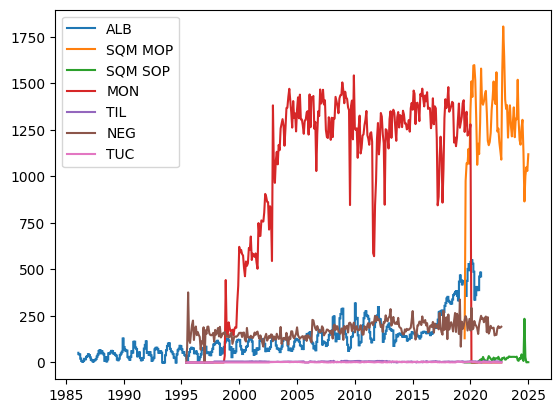

In [178]:
ALB = pd.read_csv(os.path.join("datos","pumping","ALB_pumping.csv"))
ALB["date"] = pd.to_datetime(ALB["DATE"], format="%Y-%m-%d")
ALB.set_index("date", inplace=True)

SQM = pd.read_csv(os.path.join("datos","pumping","SQM_pumping.csv"))
SQM["date"] = pd.to_datetime(SQM["Fecha final"], format="%Y-%m-%d")
SQM.set_index("date", inplace=True)

MON = pd.read_csv(os.path.join("datos","pumping","Monturaqui_pumping.csv"))
MON["fecha"] = pd.to_datetime(MON["fecha"], format="%d/%m/%Y")
MON.set_index("fecha", inplace=True)
print(MON)
MON['Total'] = MON.sum(axis=1)*-1
print(MON)

TIL = pd.read_csv(os.path.join("datos","pumping","tilopozo_pumping.csv"))
TIL["fecha"] = pd.to_datetime(TIL["fecha"], format="%d/%m/%Y")
TIL.set_index("fecha", inplace=True)
TIL['Total'] = TIL.sum(axis=1)*-1

NEG = pd.read_csv(os.path.join("datos","pumping","negrillar_pumping.csv"))
NEG["fecha"] = pd.to_datetime(NEG["fecha"], format="%d/%m/%Y")
NEG.set_index("fecha", inplace=True)
NEG['Total'] = NEG.sum(axis=1)*-1

TUC = pd.read_csv(os.path.join("datos","pumping","tucucaro_pumping.csv"))
TUC["fecha"] = pd.to_datetime(TUC["fecha"], format="%d/%m/%Y")
TUC.set_index("fecha", inplace=True)
TUC['Total'] = TUC.sum(axis=1)*-1

SQM_mop = pd.read_csv(os.path.join("datos","pumping","sqm","Bombeo mop","merged_output_mop.csv"))
SQM_mop["date"] = pd.to_datetime(SQM_mop["Fecha final"], format="%Y-%m-%d")
SQM_mop.set_index("date", inplace=True)


SQM_sop = pd.read_csv(os.path.join("datos","pumping","sqm","Bombeo sop","merged_output_sop.csv"))
SQM_sop["date"] = pd.to_datetime(SQM_sop["Fecha final"], format="%Y-%m-%d")
SQM_sop.set_index("date", inplace=True)


# print(SQM)


selected_column = "Grand Total"  # Change this to your desired column name
sub_df = ALB[[selected_column]]

selected_column2 = "Total"  # Change this to your desired column name
sub_df2 = SQM[[selected_column2]]

sub_df3 = SQM_mop[["Total"]]
sub_df4 = SQM_sop[["Total"]]

sub_df5 = MON[["Total"]]
sub_df6 = TIL[["Total"]]
sub_df7 = NEG[["Total"]]
sub_df8 = TUC[["Total"]]

# for column in sub_df.columns:
#     plt.plot(ALB.index, ALB[column])
    
wel_alb = sub_df.squeeze()
wel_alb = wel_alb.asfreq('D')

wel_sqm = sub_df2.squeeze()
wel_sqm = wel_sqm.asfreq('M')

wel_sqm_mop = sub_df3.squeeze()
wel_sqm_op = wel_sqm_mop.asfreq('M')

wel_sqm_sop = sub_df4.squeeze()
wel_sqm_sop = wel_sqm_sop.asfreq('M')

wel_mon = sub_df5.squeeze()
wel_mon = wel_mon.asfreq('M')

wel_til = sub_df6.squeeze()
wel_til = wel_til.asfreq('M')

wel_neg = sub_df7.squeeze()
wel_neg = wel_neg.asfreq('M')

wel_tuc = sub_df8.squeeze()
wel_tuc = wel_tuc.asfreq('M')

print(wel_sqm)

# plt.plot(wel_sqm.index,wel_sqm.values)
plt.plot(wel_alb.index,wel_alb.values/86.4)
plt.plot(wel_sqm_mop.index,wel_sqm_mop.values)
plt.plot(wel_sqm_sop.index,wel_sqm_sop.values)
plt.plot(wel_mon.index,wel_mon.values/86.4)
plt.plot(wel_til.index,wel_til.values/86.4)
plt.plot(wel_neg.index,wel_neg.values/86.4)
plt.plot(wel_tuc.index,wel_tuc.values/86.4)
plt.legend(["ALB","SQM MOP","SQM SOP","MON","TIL","NEG","TUC"])
plt.show()

# for column in sub_df.columns:
#     plt.plot(wel.index, wel[column])

7
3
Fit report Pozo REGLILLA SALADA  Fit Statistics
nfev    27                     EVP        29.95
nobs    32                     R2          0.30
noise   False                  RMSE        0.01
tmin    2005-01-01 00:00:00    AICc     -310.92
tmax    2023-11-08 00:00:00    BIC      -305.33
freq    D                      Obj         0.00
warmup  3650 days 00:00:00     ___             
solver  LeastSquares           Interp.       No

Parameters (7 optimized)
                     optimal      initial  vary
precipitacion_A     0.017311  1586.571122  True
precipitacion_n     0.046410     1.000000  True
precipitacion_a   326.487880    10.000000  True
evaporacion_A       0.006513     0.349518  True
evaporacion_n       1.044963     1.000000  True
evaporacion_a     902.076078    10.000000  True
constant_d       2301.113580  2301.176188  True
Fit report Pozo REGLILLA SALADA  Fit Statistics
nfev    35                     EVP        11.93
nobs    32                     R2          0.12
noise   Fa

Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations

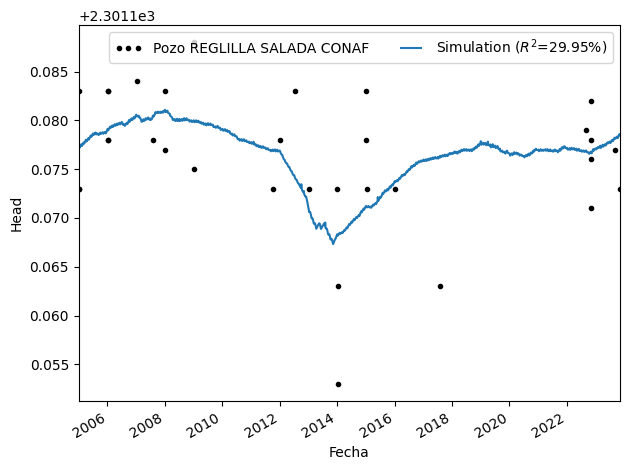

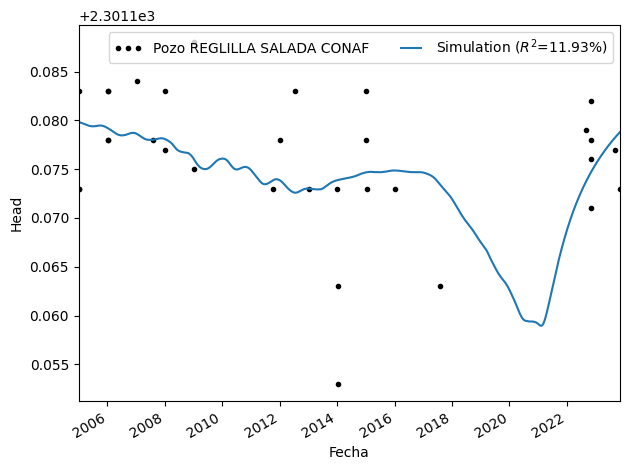

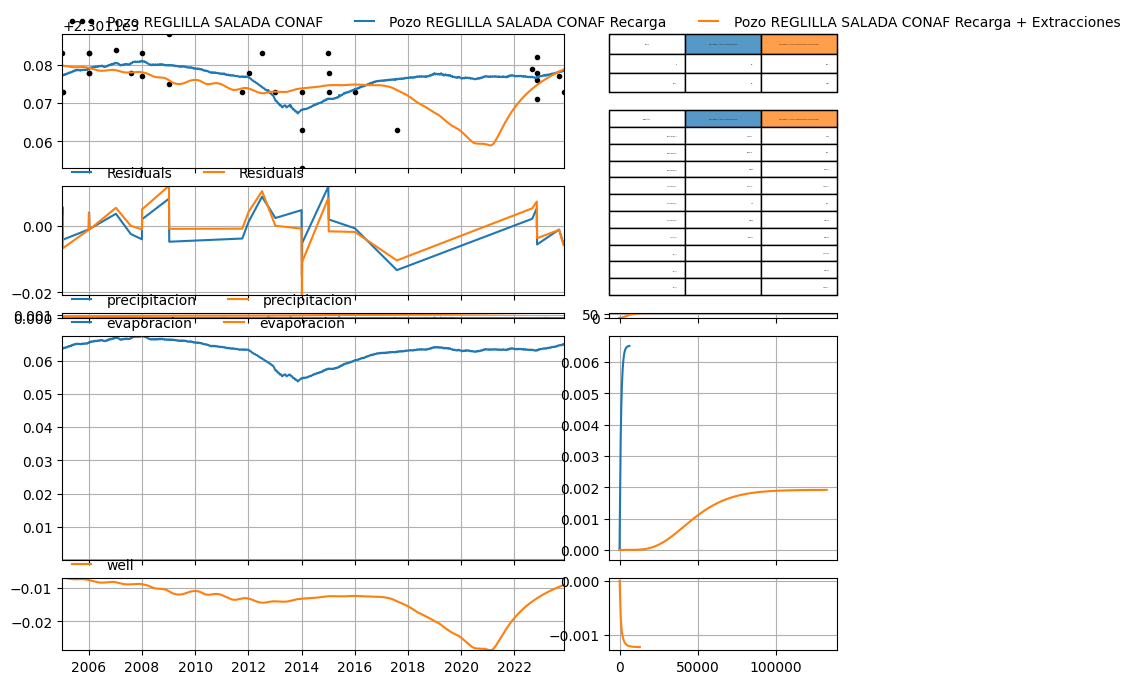

In [254]:
# --- Paso 4: Crear modelos individuales para cada pozo ---
modelos_individuales = {}

# Asegurarse de que los índices de las series de precipitación y evaporación sean de tipo datetime
precipitacion.index = pd.to_datetime(precipitacion.index, errors='coerce')
evaporacion.index = pd.to_datetime(evaporacion.index, errors='coerce')

# Eliminar NaNs de los índices de las series de precipitación y evaporación
precipitacion = precipitacion.loc[precipitacion.index.dropna()]
evaporacion = evaporacion.loc[evaporacion.index.dropna()]

# Ordenar los índices de las series de precipitación y evaporación
precipitacion = precipitacion.sort_index()
evaporacion = evaporacion.sort_index()

# Asegurarse de que las series de precipitación y evaporación tengan una frecuencia regular
precipitacion = precipitacion.asfreq('D')
evaporacion = evaporacion.asfreq('D')
# print(precipitacion)
# print(evaporacion)

# plt.plot(precipitacion.index, precipitacion.values)
# plt.plot(evaporacion.index, evaporacion.values)

list_wel = [wel_alb / 86.4, wel_sqm_mop, wel_sqm_sop, wel_tuc /86.4, wel_til / 86.4, wel_neg / 86.4, wel_mon / 86.4]
print(len(list_wel))
print(len(list_wel[0:3]))
dis = [16000,25000,28000,16000,16000,43000,63000]

list_wel2 = list_wel[0:3]

for pozo, datos in datos_pozos.items():
    if pozo == "Pozo REGLILLA SALADA CONAF":
        
        # Eliminar NaNs del índice de la serie
        datos = datos.loc[datos.index.dropna()]
        
        # Eliminar índices duplicados
        datos = datos.loc[~datos.index.duplicated(keep='first')]
        
        # Ordenar el índice de la serie
        datos = datos.sort_index()
        
        # Crear un modelo Pastas para el pozo actual
        ml = ps.Model(datos, name=pozo+" Recarga")
        #ml.add_noisemodel(ps.ArNoiseModel()) # Does not help too much
        # distances = [18000,280000000]
        # distances2 = [18000,28000,25000]
        # Añadir series de estrés (precipitación y evaporación)
        #Interna = 0.001
        #all 0.1
        sm_precip = ps.StressModel(precipitacion*0.001, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        
        sm_alb = ps.StressModel(wel_alb / 84.6, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm = ps.StressModel(wel_sqm, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        # sm_wel = ps.WellModel([wel_alb/ 1e6, wel_sqm], "WellModel", distances)
        sm_sqm_mop = ps.StressModel(wel_sqm_mop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm_sop = ps.StressModel(wel_sqm_sop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        sm_mon = ps.StressModel(wel_mon / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_til = ps.StressModel(wel_til / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_neg = ps.StressModel(wel_neg / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_tuc = ps.StressModel(wel_tuc / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        # sm_wel2 = ps.WellModel([list_wel[0],list_wel[1]], "WellModel", [dis[0],dis[1]])#dis[0:3])
        sm_wel2 = ps.WellModel(list_wel, "WellModel", dis)
   
        #POZOS
        # sm_rch = ps.RechargeModel(
        #     precipitacion,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Peterson(),
        #     settings=("prec", "evap"),
        # )    
        
        #LAGUNAS
        sm_rch = ps.RechargeModel(
            precipitacion*0.8,
            evaporacion,
            ps.Gamma(),
            name="rainevap",
            recharge=ps.rch.Linear(),
            settings=("prec", "evap"),
        )     
        
        #sm_rch = ps.RechargeModel(precipitacion, evaporacion, ps.Exponential(), "Recharge")
        
        ml.add_stressmodel(sm_precip)
        ml.add_stressmodel(sm_evap)
        # ml.add_stressmodel(sm_rch)
        ml2 = ml.copy(name=pozo+" Recarga + Extracciones")
        ml.solve()
        
        
        # ml.add_stressmodel(sm_wel)
        ml2.add_stressmodel(sm_alb)
        # # ml.add_stressmodel(sm_sqm)
        # ml.add_stressmodel(sm_sqm_mop)
        # ml.add_stressmodel(sm_sqm_sop)
        # ml2.add_stressmodel(sm_wel2)
        # ml.add_stressmodel(sm_mon)
        # ml2.add_stressmodel(sm_til)
        # ml.add_stressmodel(sm_neg)
        # ml2.add_stressmodel(sm_tuc)
        
        ml2.solve()

   

            
        # Calibrar el modelo
        # mlwel = ml.solve()
        
        # Guardar el modelo en el diccionario
        modelos_individuales[pozo] = ml

        # Graficar los resultados del modelo individual
        ml.plot()
        ml2.plot()
        
        mc = ps.CompareModels(models=[ml, ml2])
        mc.plot(adjust_height=True)
        # ml.plots.results(figsize=(10, 6))
        ml.stats.summary()
        ml2.stats.summary()

        # ml.plots.stacked_results(
        #         figsize=(10, 8),
        #         stacklegend=True,
        #         stackcolors={"Extraction_2": "C1",},
            
        # )
        # plt.title(f"Modelo para el {pozo}")
        # plt.show()
        


In [255]:
# # --- Paso 5: Crear un modelo conjunto para todos los pozos ---
# mosaic = [
#     ["ose", "ose", "met"],
#     ["sim", "sim", "tab"],
# ]
# mc.initialize_figure(mosaic, figsize=(16, 10), cmap="Dark2")

# mc.plot_oseries(axn="ose")
# mc.plot_simulation()
# _ = ax.legend(loc=(0, 1), frameon=False, ncol=2)
mc.get_metrics()


,Pozo REGLILLA SALADA CONAF Recarga,Pozo REGLILLA SALADA CONAF Recarga + Extracciones
rmse,0.005800,0.006504
rmsn,NaN,NaN
sse,0.001077,0.001354
mae,0.004588,0.004773
nse,0.299511,0.119301
evp,29.951114,11.930076
rsq,0.299511,0.119301
kge,0.360924,0.074362
bic,-305.330788,-287.607574
aic,-315.590939,-302.264933
